# Course Introduction and Review

Imports required in the folowing

In [1]:
import os

import numpy as np
import pandas as pd
import scipy as sp

import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('seaborn-dark')

import statsmodels.api as sm
import statsmodels.formula.api as smf

C:\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
%matplotlib inline
%qtconsole

## Outline

* What is a regression model?

* Descriptive statistics -- numerical

* Descriptive statistics -- graphical

* Inference about a population mean
  
* Difference between two population means

# What is course about?


* It is a course on applied statistics.

* Hands-on: I use [Python](https://www.python.org/), as on open-source programming language having a lot of statistic packages.

* Course notes will be [jupyter](http://jupyter.org) notebooks.

* We will start out with a review of introductory statistics to see `Python` in action.
 
* Main topic is *(linear) regression models*: these are the *bread and butter* of applied statistics.

## What is a regression model? 

A regression model is a model of the relationships between some 
*covariates (predictors)* and an *outcome*.

Specifically, regression is a model of the *average* outcome *given or having fixed* the [covariates](https://en.wikipedia.org/wiki/Covariate). 

# Heights of mothers and daughters
  
* Heights of mothers and daughters collected by Karl Pearson in the late 19th century.

* One of our goals is to understand height of the daughter, `D`, knowing the height of the
mother, `M`.

* A mathematical  model might look like
  $$
  D = f(M) + \varepsilon$$
  where $f$ gives the average height of the daughter
  of a mother of height `M` and
  $\varepsilon$ is *error*: not *every* daughter has the same height.

* A statistical question: is there *any*
relationship between covariates (height of mothers) and outcomes (height of daughters) -- is $f$ just a constant?

Let's create a plot of the heights of the mother/daughter pairs. The data was scraped from alr3 R package and saved as `01_heights.csv` in the data folder accompanying this notebook.

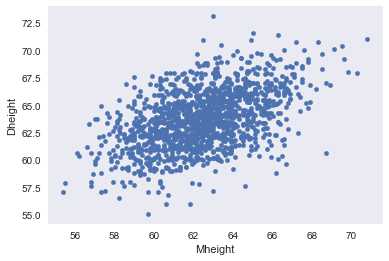

In [3]:
fpath=os.path.join(os.getcwd(),r'data/01_heights.csv')
df=pd.DataFrame.from_csv(fpath)
df.plot.scatter(x='Mheight',y='Dheight')

In the first part of this course we'll talk about fitting a line to this data. Let's do that and remake the plot, including this "best fitting line".

In [4]:
results = smf.ols('Dheight ~ Mheight',data=df).fit()
#results.params.Intercept
#results.params.Mheight

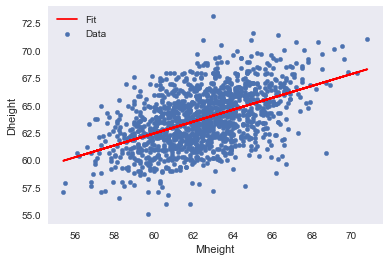

In [5]:
fig, ax = plt.subplots()
df.plot.scatter(x='Mheight',y='Dheight',ax=ax,label='Data')
ax.plot(df.Mheight, df.Mheight*results.params.Mheight+results.params.Intercept, 'r',label='Fit')
# alternatively using numpy.polyval
#ax.plot(df.Mheight, np.polyval(results.params.values[::-1],df.Mheight), 'r',label='Fit')
ax.legend()

# Linear regression model

* How do we find this line? With a model.

* We might model the data as
$$
D = \beta_0+ \beta_1 M + \varepsilon.
$$

* This model is *linear* in $\beta_1$, the coefficient of  $M$ (the mother's height), it is a 
*simple linear regression model*.

* Another model:
$$
D = \beta_0 + \beta_1 M + \beta_2 M^2  + \beta_3 F + \varepsilon
$$
where $F$ is the height of the daughter's father.

* Also linear (in the coefficients of  $M,M^2,F$).

* Which model is better? We will need a tool to compare models... more to come later.

# A more complex model

* Our example here was rather simple: we only had one independent variable.

* Independent variables are sometimes called *features* or *covariates*.

* In practice, we often have many more than one independent variable.

# Right-to-work

This example considers the effect of right-to-work legislation (which varies by state) on various
factors. The corresconding dataset can be found [here](http://www1.aucegypt.edu/faculty/hadi/RABE4/Data4/P005.txt).
Alternatively, the dataset is saved in *01_right_to_work.txt* in the _data_ folder accompanying this notebook.

The variables are:

* Income: income for a four-person family

* COL: cost of living for a four-person family

* PD: Population density

* URate: rate of unionization in 1978

* Pop: Population

* Taxes: Property taxes in 1972

* RTWL: right-to-work indicator
   

In a study like this, there are many possible questions of interest. Our focus will be on the
relationship between `RTWL` and `Income`. However, we should recognize that other variables
have an effect on `Income`. Let's look at some of these relationships.

In [6]:
fpath=os.path.join(os.getcwd(),r'data/01_right_to_work.txt')
df=pd.read_table(fpath)

#or from url
#df=pd.read_table('http://www1.aucegypt.edu/faculty/hadi/RABE4/Data4/P005.txt')

df.head()

City  COL   PD  URate      Pop  Taxes  Income  RTWL
0      Atlanta  169  414   13.6  1790128   5128    2961     1
1       Austin  143  239   11.0   396891   4303    1711     1
2  Bakersfield  339   43   23.7   349874   4166    2122     0
3    Baltimore  173  951   21.0  2147850   5001    4654     0
4  Baton Rouge   99  255   16.0   411725   3965    1620     1

A graphical way to visualize the relationship between Income and RTWL is the boxplot.

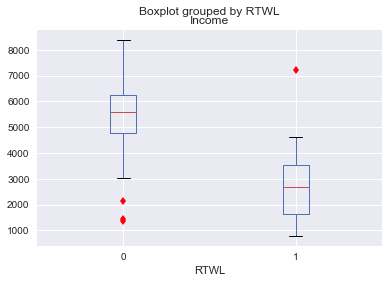

In [7]:
flierprops = dict(marker='d', markerfacecolor='red', linestyle='none')
df.boxplot('Income','RTWL',flierprops=flierprops)

One variable that may have an important effect on the relationship between is the cost of living `COL`. It also varies between right-to-work states.

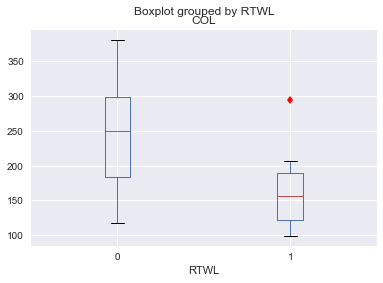

In [8]:
df.boxplot('COL','RTWL',flierprops=flierprops)

We may want to include more than one plot in a given display. For this purpose subplots should be defined first.

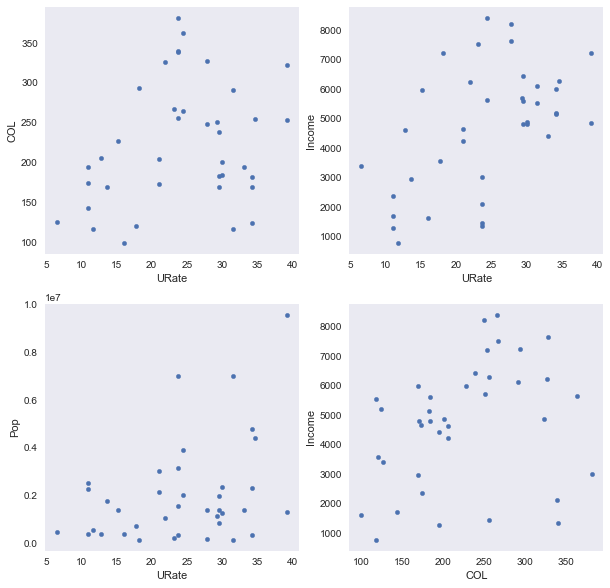

In [9]:
fig, axs = plt.subplots(2,2)
fig.set_size_inches(10,10)

df.plot.scatter('URate','COL',ax=axs[0,0])
df.plot.scatter('URate','Income',ax=axs[0,1])
df.plot.scatter('URate','Pop',ax=axs[1,0])
df.plot.scatter('COL','Income',ax=axs[1,1])

`seaborn` module has a function `pairplot` that displays pairwise relationships in a given dataset.

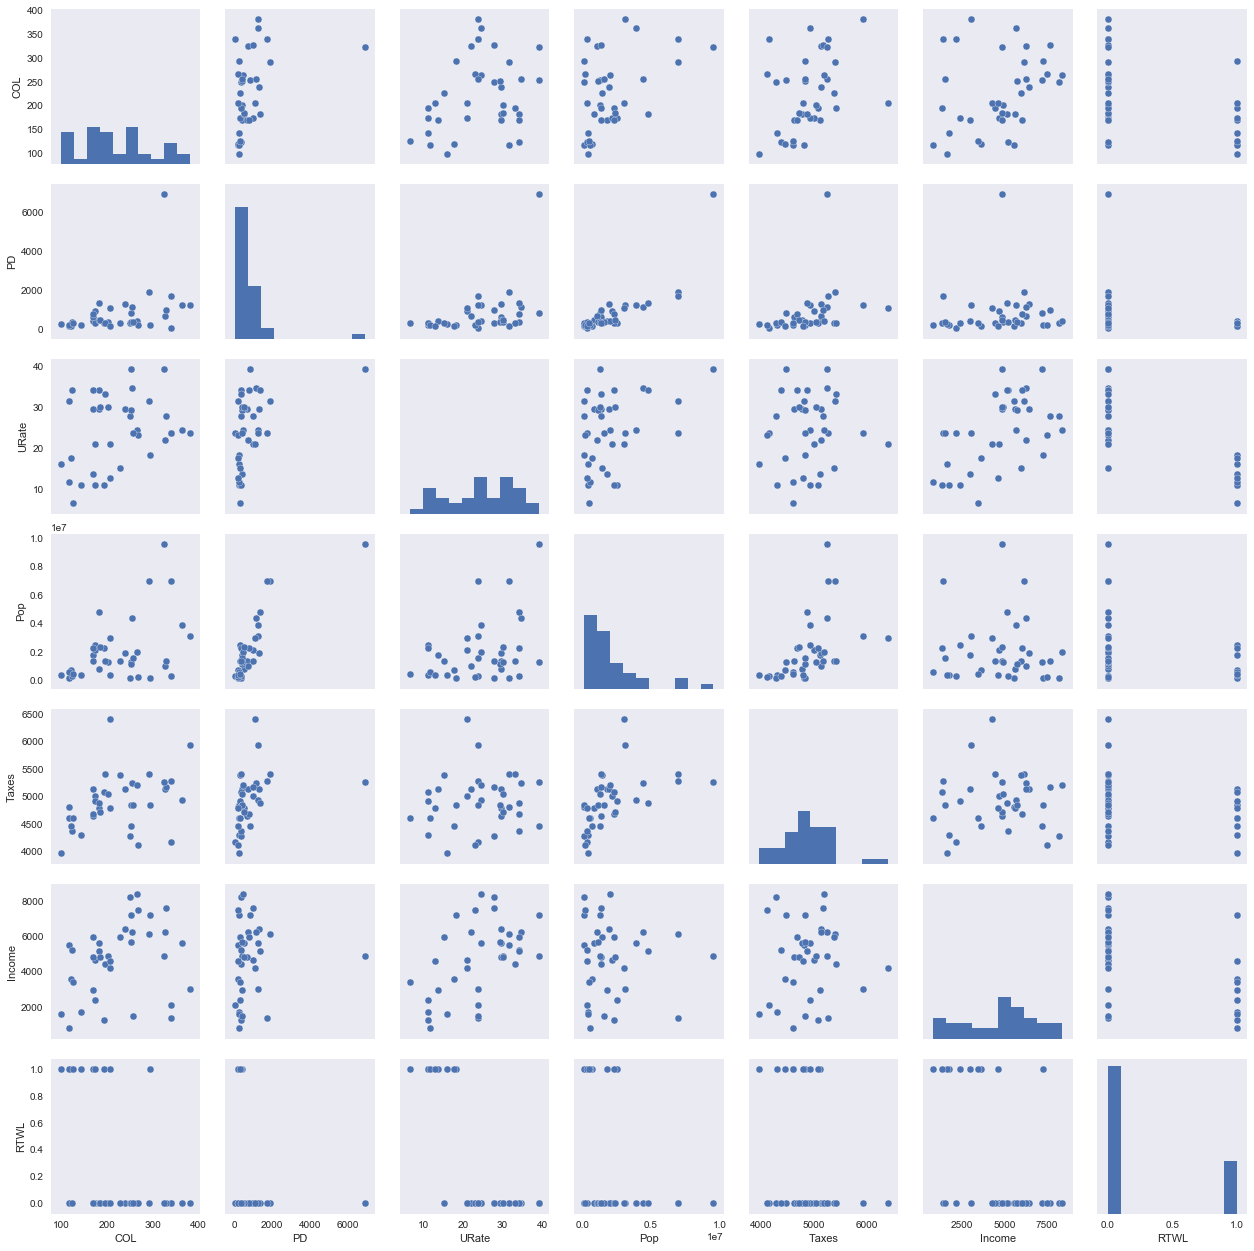

In [10]:
sns.pairplot(df)

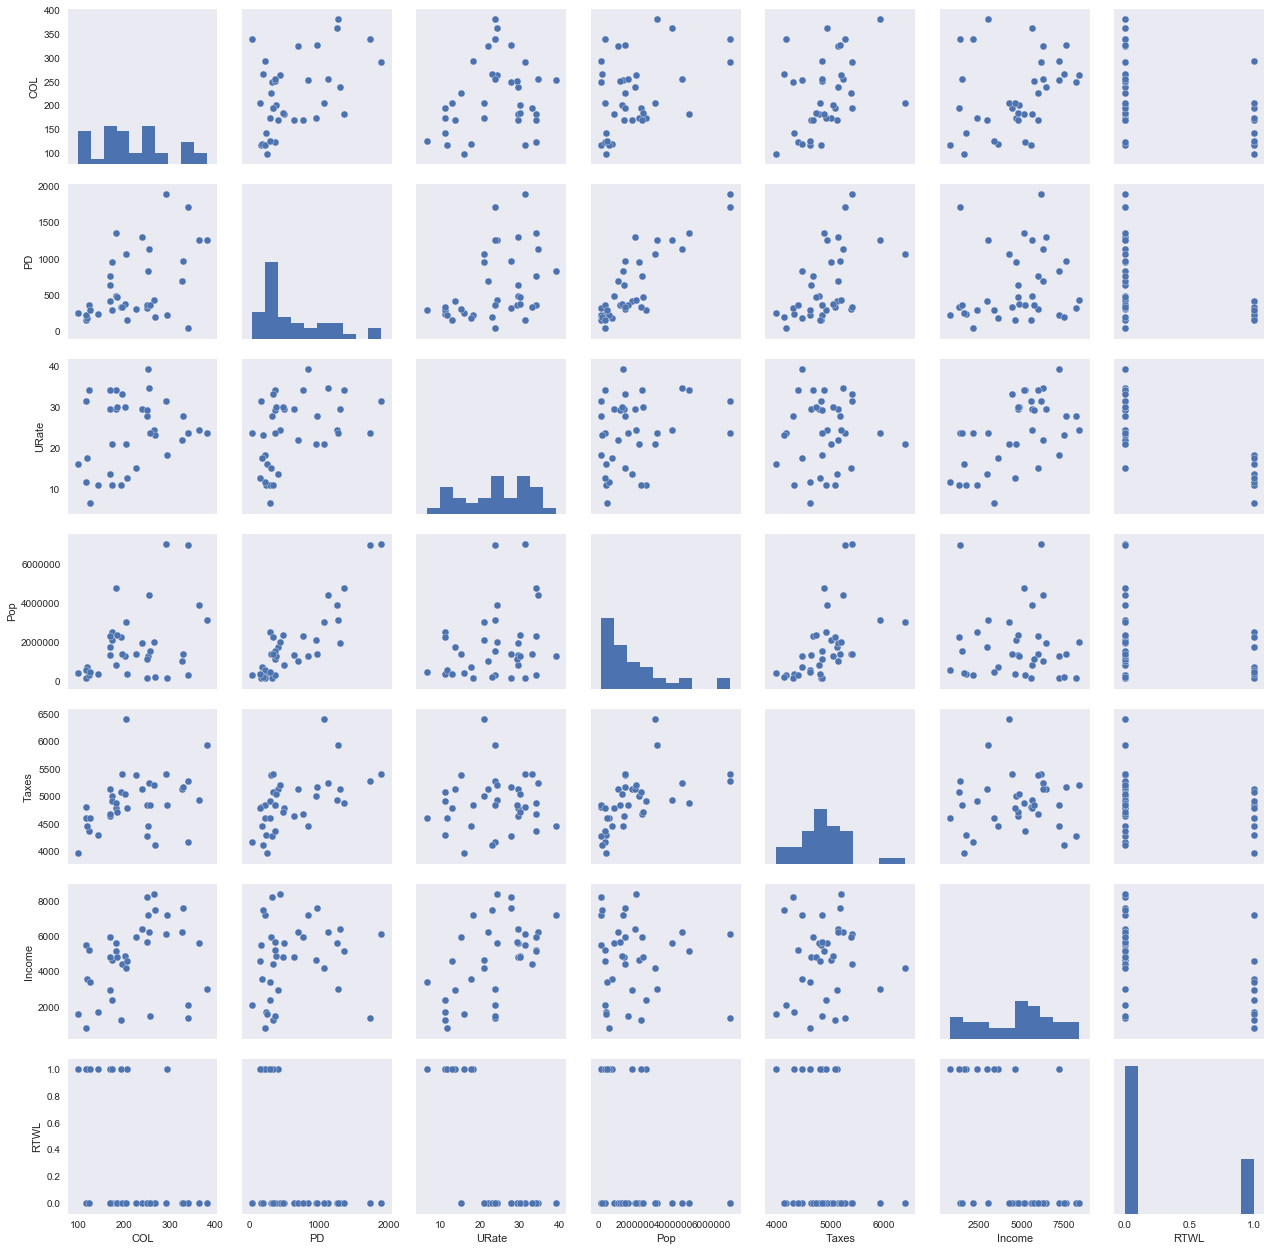

In [11]:
sns.pairplot(df[~(df.City=="New York")])

# Right-to-work example

## Building a model

Some of the main goals of this course:

* Build a statistical model describing the *effect* of `RTWL` on `Income`.

* This model should recognize that other variables also affect `Income`.

* What sort of *statistical confidence* do we have in our 
conclusion about `RTWL` and `Income`?

* Is the model adequate do describe this dataset?

* Are there other (simpler, more complicated) better models?


# Numerical descriptive statistics

## Mean of a sample

Given a sample of numbers $X=(X_1, \dots, X_n)$ the sample mean, $\overline{X}$ is
$$\overline{X} = \frac1n \sum_{i=1}^n X_i.$$

There are a lot of possibilities to calculate mean in Python depending on the used packages. 
`numpy` is an established package for all possible sorts of calculations. `pandas` uses `numpy`'s arrays inernally and is developed for data analysis. 

In [12]:
c=np.array([1,3,5,7,8,12,19])
s_pd=pd.Series(s_np)

print(s_np.mean())
print(s_pd.mean())

NameError: name 's_np' is not defined

## Standard deviation of a sample

Given a sample of numbers $X=(X_1, \dots, X_n)$ the sample standard deviation $S_X$ is

$$ S_X =\sqrt{ \frac{1}{n-1}  \sum_{i=1}^n (X_i-\overline{X})^2.} $$

In [ ]:
S = np.sqrt( np.sum((s_np - s_np.mean())**2) / (s_np.size-1) )
print(S)

Or using built-in `numpy` od `pandas` functions:

In [ ]:
print(s_np.std(ddof=1))
print(s_pd.std())

<font color="red">__Important note__ </font>

Due to univirsal definitions of `std` and `var` functions in `numpy`, different number of degrees of freedom can be set. According to the [documentation](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.std.html) the default value is `ddof=0`, therefore `ddof=1` must passed explicitly to divide by $n-1$. In `pandas` the default value is `ddof=1`.

The reason for a normalization by $n-1$ is a consequence of the fact that we want to asses the standard deviation of the population mean based on the given sample. For more details and explanations any statistical book  can be reffered to.

## Median of a sample

Given a sample of numbers $X=(X_1, \dots, X_n)$ the sample median is the `middle` of the sample:
if $n$ is even, it is the average of the middle two points.
If $n$ is odd, it is the midpoint.

In [ ]:
print( np.median(s_np) )
print( s_pd.median()   )

## Quantiles of a sample

Given a sample of numbers $X=(X_1, \dots, X_n)$ the  $q$-th quantile is a point $x_q$ in the data such that $q \cdot 100\%$ of the data are smaller than $x_q$.

### Example

The $0.5$-quantile is the median: half 
of the data lie to the right of the median

In [ ]:
print( np.percentile(s_np, [25,50,75]) )
print()
print( s_pd.quantile([0.25,0.5,0.75])  )

# Graphical statistical summaries

Let's load another dataset on [calcium suplementation](http://lib.stat.cmu.edu/DASL/Datafiles/Calcium.html) was downloaded and saved in the `03_calcium.txt` file in the data folder accompanying this note book.

In [ ]:
fpath=os.path.join(os.getcwd(), 'data', '01_calcium.txt')
calcium=pd.read_table(fpath)

We've already seen a boxplot. Another common statistical summary is a histogram.

Using `pandas`:

In [ ]:
ax=calcium.Decrease.plot.hist(5)
ax.set_xlabel('Decrease')
ax.set_title('Treated group')

or using `seaborn`:

In [ ]:
sns.distplot(calcium.Decrease,kde=True)

As a side note, both `pandss.plot` and `seaborn` are based on `matplotlib` library. Therefore, they have similar syntax, which makes them complementary to each other.

# Inference about a population mean

## A testing scenario

* Suppose we want to determine the efficacy of a new drug on blood pressure.

* Our study design is: we will treat
a large patient population (maybe not so large: budget constraints limit it $n=20$) with the drug and measure their
blood pressure before and after taking the drug.

* One way to conclude that the drug is effective if the blood pressure has decreased. That is,
if the average difference between before and after is positive.


## Setting up the test



* The *null hypothesis*, <font color="red">$H_0$</font> is: <font color="red">*the average difference is less
than zero.*</font>

* The *alternative hypothesis*, <font color="green">$H_a$</font>, is: <font color="green">*the average difference 
is greater than zero.*</font>

* Sometimes (actually, often), people will test the alternative, <font color="green">$H_a$</font>: *the
average difference is not zero* vs. <font color="red">$H_0$</font>: *the average difference is zero.*

* The test is performed by estimating
the average difference and converting to standardized units.


## Drawing from a box

* Formally, could set up the above test as drawing from a box of *differences
in blood pressure*.

* A box model is a useful theoretical device that describes the experiment
under consideration. In our example, we can think of the sample of decreases
drawn 20 patients at random from a large population (box) containing all the possible
decreases in blood pressure.

## A simulated box model

* In our box model, we will assume that the decrease is an integer drawn at random on the interval from -3 to 6.
* We will draw $n=20$ random integers from -3 to 6 with replacement and test whether the mean of our "box" is 0 or not.

In [ ]:
n=20
mysample=np.random.choice(np.arange(-3,7),n)
print(mysample)

The test is usually a $T$ test that has the form

$$ T = \frac{\overline{X}-0}{S_X/\sqrt{n}} $$
    
The formula can be read in three parts:

- estimating the mean: $\overline{X}$;

- comparing to 0: subtracting 0 in the numerator;

- converting difference to standardized units: dividing by $S_X/\sqrt{n}$

In [ ]:
T=(mysample.mean()-0)/(mysample.std(ddof=1)/np.sqrt(n))
print(T)

The same using `scipy`:

In [ ]:
Tsp=sp.stats.ttest_1samp(mysample,0)
print(Tsp.statistic)

The test statistic $T$ is then compared to an appropriate value (double-sided $df=19$ degrees of freedom) of T distribution with a significance level $\alpha=5\%$:

In [ ]:
cutoff=sp.stats.t.ppf(0.975,19)
print(cutoff)

The result of the test is

In [ ]:
(abs(T) > cutoff)

If result is `True`, then we reject $H_0$ that the mean is 0 at a significance level of 5%, while if it is `False` we do not reject $H_0$. Of course, in this example we know the mean in our "box" is not 0, it is 1.5.

For a sample size of size $n$ and a significance level $\alpha$ the cutoff is written $t_{n−1,1−\alpha/2}$.

This rule can be visualized with the Probability density function of T distribution. The total grey area is 0.05 (=5%), and the cutoff is chosen to be symmetric around zero and such that this area is exactly 5%

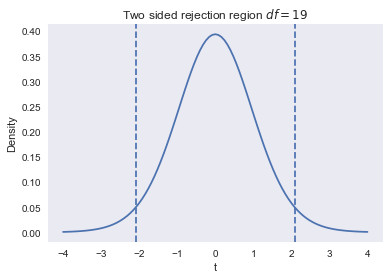

In [57]:
x=np.linspace(-4,4,101)
y=sp.stats.t.pdf(x,df=19)

plt.plot(x,y)
plt.axvline(sp.stats.t.ppf(0.975,19),linestyle='--')
plt.axvline(sp.stats.t.ppf(0.025,19),linestyle='--')

ax=plt.gca()
ax.set_ylabel('Density')
ax.set_xlabel('t')
ax.set_title('Two sided rejection region $df=19$')

## Reasoning behind the test

Suppose $H_0$ was true -- say the mean of the box was zero.

For example, we might assume the difference is drawn at random from integers -5 to 5 inclusive.

In [37]:
def get_T(n):
    # function to calculate t-value for a random sample 
    # of integers of size n taken from the interval [-5,5]
    
    mysample = np.random.choice(np.arange(-5,5+1),n)
    t=sp.stats.ttest_1samp(mysample,0)
    return t.statistic

## Type I error

When the null hypothesis is true, like in our simulation,
we expect that the $T$ statistic will exceed the cutoff only about 5% of the time.

If we use the cutoff $t_{19,0.975}$ to decide in favor or against $H_0$, rejecting
$H_0$ when the absolute value is larger than this value, then we have a test whose
**Type I error** is about 5%.

It is exactly 5% if the sample were drawn from a box whose values follow a normal curve...

In [38]:
results=np.array([get_T(20) for i in range(10000)])
np.mean( np.abs(results) >= sp.stats.t.ppf(0.975, 19))

0.0533

We use the $T$ curve (close to the normal curve) because when $H_0$ is true, the distribution of the T statistic is close to the $T$ curve

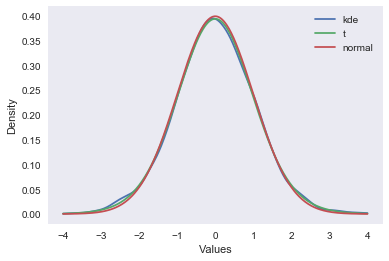

In [50]:
fig, ax = plt.subplots(1,1)

xvals=np.linspace(-4,4,401)

kde_vals = sp.stats.kde.gaussian_kde( results )
t_vals=sp.stats.t.pdf(xvals,df=19)  # t df=19
norm_vals=sp.stats.norm.pdf(xvals) # Normal(0,1) density

ax.plot( xvals, kde(xvals), label = 'kde' )
ax.plot( xvals, t_vals, label = 't' )
ax.plot( xvals, norm_vals, label = 'normal' )
ax.set_ylabel('Density')
ax.set_xlabel('Values')

ax.legend()

`scipy.stats.ttest_1samp` calculates $t$ statistic and a corresponding $p$ value

In [54]:
mysample = np.random.choice(np.arange(-5,5+1),20)
print(sp.stats.ttest_1samp(mysample,0))

Ttest_1sampResult(statistic=-1.0680416403825246, pvalue=0.29888455717803342)


As mentioned above, sometimes tests are one-sided. If the null hypothesis we tested was that the mean is less than 0, then we would reject this hypothesis if our observed mean was much smaller than 0. This corresponds to a positive $t$ value.

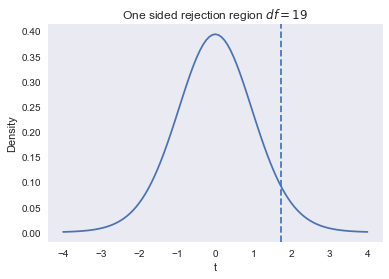

In [61]:
x=np.linspace(-4,4,101)
df=19
y=sp.stats.t.pdf(x,df=df)

plt.plot(x,y)
plt.axvline(sp.stats.t.ppf(0.95,df=df),linestyle='--')

ax=plt.gca()
ax.set_ylabel('Density')
ax.set_xlabel('t')
ax.set_title(f'One sided rejection region $df={df}$')

The rejection rules are affected by the degrees of freedom. Here is the rejection region when we only have 5 samples from our "box".

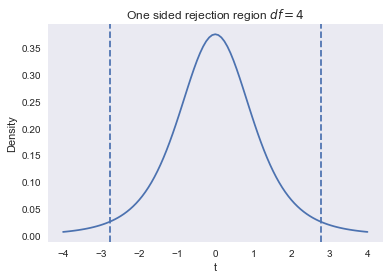

In [62]:
x=np.linspace(-4,4,101)

df=4
y=sp.stats.t.pdf(x,df=df)

plt.plot(x,y)
plt.axvline(sp.stats.t.ppf(0.975,df=df),linestyle='--')
plt.axvline(sp.stats.t.ppf(0.025,df=df),linestyle='--')

ax=plt.gca()
ax.set_ylabel('Density')
ax.set_xlabel('t')
ax.set_title(f'One sided rejection region $df={df}$')

## Confidence intervals

* Instead of testing a particular hypothesis, we might be interested
in coming up with a reasonable range for the mean of our "box".

* Statistically, this is done via a *confidence interval*.

* If the 5% cutoff is $q$ for our test, then the 95% confidence interval is
$$
[\bar{X} - q S_X / \sqrt{n}, \bar{X} + q S_X / \sqrt{n}]
$$
where we recall $q=t_{n-1,0.975}$ with $n=20$. 

* If we wanted 90% confidence interval, we would use $q=t_{19,0.95}$. Why?

In [94]:
n=20
cutoff=sp.stats.t.ppf(0.95,df=19)

mysample = np.random.choice(np.arange(-5,5+1),n)
print(f'Sample mean {mysample.mean()}')
print(f'True mean 0')

L = mysample.mean() - cutoff*mysample.std(ddof=1)/np.sqrt(n)
R = mysample.mean() + cutoff*mysample.std(ddof=1)/np.sqrt(n)

print(f'Left = {L}, Right = {R}')

Sample mean 0.4
True mean 0
Left = -2.1412958514388567, Right = 2.9412958514388565


Note that the endpoints above depend on the data. Not every interval will cover the true mean of our "box" which is 1.5. Let's take a look at 100 intervals of size 90%. We would expect that roughly 90 of them cover 1.5.

In [119]:
n=20
nint=100

cutoff=sp.stats.t.ppf(0.95,df=19)

L=np.zeros(nint)
R=np.zeros(nint)

vals=np.arange(-3,6+1)
true_mean = vals.mean()

for i in range(nint):
    mysample = np.random.choice(vals,n)
    L[i]=mysample.mean() - cutoff*mysample.std(ddof=1)/np.sqrt(n)
    R[i]=mysample.mean() + cutoff*mysample.std(ddof=1)/np.sqrt(n)

idxin=np.logical_and(L<true_mean, true_mean<R)    
ncoveringmean=idxin.sum()
print(f"number of confodence intervals covering the true mean is {ncoveringmean}")

number of confodence intervals covering the true mean is 91


A useful picture is to plot all these intervals so we can see the randomness in the intervals, while the true mean of the box is unchanged.

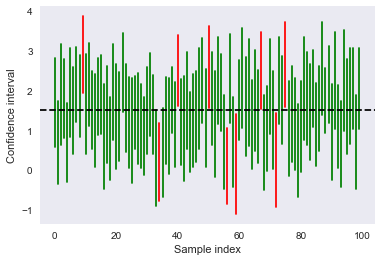

In [128]:
fig, ax = plt.subplots(1,1)

xvals=np.vstack([np.arange(100),np.arange(100)])
yvals=np.vstack([L,R])

_=ax.plot(xvals[:,idxin],yvals[:,idxin],color='green')
_=ax.plot(xvals[:,~idxin],yvals[:,~idxin],color='red')
_=ax.axhline(true_mean,linestyle='--',color='black')
ax.set_xlabel('Sample index')
ax.set_ylabel('Confidence interval')

# Blood pressure example

* A study was conducted to study the effect of calcium supplements
on blood pressure.

* More detailed data description can be found [here](http://lib.stat.cmu.edu/DASL/Datafiles/Calcium.html).

* We had loaded the data above, storing the two samples in the variables `treated` and `placebo`.

* Some questions might be:
    - What is the mean decrease in BP in the treated group? placebo group?
    - What is the median decrease in BP in the treated group? placebo group?
    -  What is the standard deviation of decrease in BP in the treated group? placebo group?
    - Is there a difference between the two groups? Did BP decrease more in the treated group?

In [148]:
fpath=os.path.join(os.getcwd(), 'data', '01_calcium.txt')
treatment=pd.read_table(fpath)

treated=treatment[treatment.Treatment == 'Calcium']
placebo=treatment[treatment.Treatment == 'Placebo']

In [149]:
treated.describe()

Begin         End   Decrease
count   10.000000   10.000000  10.000000
mean   114.900000  109.900000   5.000000
std     10.836666    7.795298   8.743251
min    102.000000  100.000000  -5.000000
25%    107.750000  104.250000  -2.750000
50%    111.500000  109.000000   4.000000
75%    120.250000  114.750000  10.750000
max    136.000000  125.000000  18.000000

In [137]:
placebo.describe()

Begin         End   Decrease
count   11.000000   11.000000  11.000000
mean   113.272727  113.909091  -0.272727
std      9.023202   11.326558   5.900693
min     98.000000   95.000000 -11.000000
25%    109.500000  109.000000  -3.000000
50%    112.000000  114.000000  -1.000000
75%    118.000000  120.000000   2.500000
max    130.000000  133.000000  12.000000

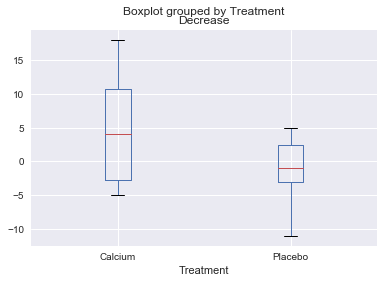

In [150]:
treatment.boxplot(column='Decrease',by='Treatment')

## A hypothesis test

In our setting, we have two groups that we have reason to believe are 
different.

* We have two samples:
   - $(X_1, \dots, X_{10})$ (`treated`)
   - $(Z_1, \dots, Z_{11})$ (`placebo`)
   
* We can answer this statistically by testing the null hypothesis 
$$H_0:\mu_X = \mu_Z.$$

* If variances are equal, the *pooled $t$-test* is appropriate.

## Pooled $t$ test

* The test statistic is $$ T = \frac{\overline{X} - \overline{Z} - 0}{S_P \sqrt{\frac{1}{10} + \frac{1}{11}}}, \qquad S^2_P = \frac{9 \cdot S^2_X + 10 \cdot S^2_Z}{19}.$$
   
*  For two-sided test at level $\alpha=0.05$, reject if $|T| > t_{19, 0.975}$.
   
* Confidence interval: for example, a $90\%$ confidence interval
for $\mu_X-\mu_Z$ is $$ \overline{X}-\overline{Z} \pm S_P \sqrt{\frac{1}{10} + \frac{1}{11}} \cdot  t_{19,0.95}.$$

* t statistic has the same form as before!

In [157]:
sdP = np.sqrt((9*treated.Decrease.std()**2 + 10*placebo.Decrease.std()**2)/19)
T = (treated.Decrease.mean()-placebo.Decrease.mean()) / (sdP * np.sqrt(1/10+1/11))

df=19
cutoff=sp.stats.t.ppf(0.95,df=df)

print(f't statistic {T:1.2f}, t distribution value {cutoff:1.2f}')

t statistic 1.63, t distribution value 1.73


`scipy` has a builtin function to perform such t-tests.

In [158]:
sp.stats.ttest_ind(treated.Decrease,placebo.Decrease,equal_var=True)

Ttest_indResult(statistic=1.6341082415908594, pvalue=0.11869682666685942)

If we don't make the assumption of equal variance of the samples, `scipy` will give a slightly different result using Welch’s t-test.

In [159]:
sp.stats.ttest_ind(treated.Decrease,placebo.Decrease,equal_var=False)

Ttest_indResult(statistic=1.6037172876755148, pvalue=0.12883936962193396)

## Pooled estimate of variance

* The rule for the $SD$ of differences is
   $$
   SD(\overline{X}-\overline{Z}) = \sqrt{SD(\overline{X})^2+SD(\overline{Z})^2}$$
   
* By this rule, we might take our estimate to be
   $$
   \widehat{SD(\overline{X}-\overline{Z})} = \sqrt{\frac{S^2_X}{10} + \frac{S^2_Z}{11}}.
   $$
   
* The pooled estimate assumes $\mathbb{E}(S^2_X)=\mathbb{E}(S^2_Z)=\sigma^2$ and replaces
   the $S^2$'s above with $S^2_P$, a better estimate of
   $\sigma^2$ than either $S^2_X$ or $S^2_Z$.

## Where do we get $df=19$?

Well, the $X$  sample has $10-1=9$ degrees of freedom
   to estimate $\sigma^2$ while the $Z$  sample
   has $11-1=10$ degrees of freedom.
   
Therefore, the total degrees of freedom is $9+10=19$.

## Our first regression model

* We can put the two samples together:
   $$Y=(X_1,\dots, X_{10}, Z_1, \dots, Z_{11}).$$

*  Under the same assumptions as the pooled $t$-test:
   $$
   \begin{aligned}
   Y_i &\sim N(\mu_i, \sigma^2)\\
   \mu_i &=
   \begin{cases}
   \mu_X & 1 \leq i \leq 10 \\ \mu_Z & 11 \leq i \leq 21.
   \end{cases}
   \end{aligned}
   $$
   
* This is a (regression) model for the sample $Y$. The
   (qualitative) variable `Treatment` is
   called a *covariate* or *predictor*.
   
* The decrease in BP is the *outcome*.

* We assume that the relationship between treatment and average
   decrease in BP is simple: it depends only on which group a subject is in.
   
* This relationship is *modelled* through the mean
   vector $\mu=(\mu_1, \dots, \mu_{21})$.

In [165]:
print(smf.ols('Decrease ~ Treatment',data=treatment).fit().summary())
print(sdP*np.sqrt(1/10+1/11))
print(sdP)

                            OLS Regression Results                            
Dep. Variable:               Decrease   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.670
Date:                Mon, 25 Dec 2017   Prob (F-statistic):              0.119
Time:                        11:50:59   Log-Likelihood:                -70.735
No. Observations:                  21   AIC:                             145.5
Df Residuals:                      19   BIC:                             147.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.0000 

In [163]:
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Decrease   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.077
Method:                 Least Squares   F-statistic:                     2.670
Date:                Mon, 25 Dec 2017   Prob (F-statistic):              0.119
Time:                        11:46:22   Log-Likelihood:                -70.735
No. Observations:                  21   AIC:                             145.5
Df Residuals:                      19   BIC:                             147.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
Intercept                5.0000      2.335      2.141      0.045       0.112       9.888
Treatment[T.Placebo]    -5.2727      3.227     -1.634      0.119     -12.026       1.481
==============================================================================
Omnibus:                        1.015   Durbin-Watson:                   2.085
Prob(Omnibus):                  0.602   Jarque-Bera (JB):                0.918
Skew:                           0.314   Prob(JB):                        0.632
Kurtosis:                       2.191   Cond. No.                         2.68
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""